In [1]:

!pip install pandas seaborn scikit-learn

   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.8 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.8 MB 4.7 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.8 MB 4.1 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.8 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.5/8.8 MB 4.7 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 8.8/8.8 MB 5.8 MB/s  0:00:01
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 11.6 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/39.4 MB 9.1 MB/s eta 0:00:04
   ----- ------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

y_regression = [1.35, 0.39, 1.22, 3.39] # только числа
y_classification = ['cat', 'crocodile', 'dog', 'elephan'] # метки классов

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\Елена\PycharmProjects\JupyterProject1\Employeers_data.csv')

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  int64 
 1   age               10000 non-null  int64 
 2   Sex               10000 non-null  object
 3   Occupation        10000 non-null  object
 4   Field             10000 non-null  object
 5   Working Hours     10000 non-null  object
 6   Package           10000 non-null  object
 7   Job Type          10000 non-null  object
 8   Company Type      10000 non-null  object
 9   Marital Status    10000 non-null  object
 10  Location          10000 non-null  object
 11  Cerifications     10000 non-null  object
 12  Education_level   10000 non-null  object
 13  Bonus             10000 non-null  object
 14  Allowances        8672 non-null   object
 15  OverTime Pay      10000 non-null  object
 16  Salary Per Month  10000 non-null  object
dtypes: int64(2), 

In [9]:

# сразу обозначаем признаки, которые мы используем
df.Bonus = df.Bonus.astype('category')

In [10]:
'Age' in df.columns

False

In [11]:
# В задачах ML мы должны выделить целевую переменную Y и остальное оставить X
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y

y = df['age']
X = df.drop('age', axis=1) if 'age' in df.columns else df

# P.S. принято обозначать Y как целевая переменная, x - зависимая

In [12]:
X.head(n=3) # первые 3 строки перменной X, удостоверимя что age не существует

,id,Sex,Occupation,Field,Working Hours,Package,Job Type,Company Type,Marital Status,Location,Cerifications,Education_level,Bonus,Allowances,OverTime Pay,Salary Per Month
0,1,Female,Intermediate,CA,1 Hr,6 LPA,Remote,Non-Profit / NGO,Divorced,Metro,CFA (Chartered Financial Analyst),Professional Certification,"₹5,000 - ₹20,000",Medical Allowance,₹200/hour,77000 Rs
1,2,Male,Working professional,CA,3 Hr,27 LPA,Remote,Consultancy Firm,Divorced,Rural,AWS Certified Solutions Architect,Professional Certification,No Bonus,Multiple Allowances,₹300/hour,41000 Rs
2,3,Female,Intermediate,Finance,7 Hr,30 LPA,Remote,Outsourcing / Service-based Company,Single,City,Certified Data Scientist,Diploma,No Bonus,Medical Allowance,Compensatory Off (No extra pay),35000 Rs


In [13]:
y.head(n=3)

0    70
1    41
2    33
Name: age, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression # модель линейной регрессии

k > 0: 1.2657447490499885 b: 1.1000373497422544
k < 0: -0.9946882262915359 b: -1.0061930513411774


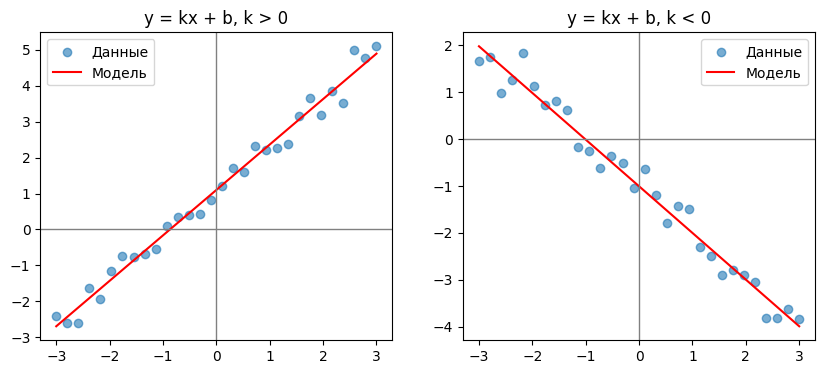

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Синтетические данные для положительного наклона
X_pos = np.linspace(-3, 3, 30).reshape(-1, 1)
y_pos = 1.2 * X_pos.flatten() + 1 + np.random.normal(0, 0.3, size=X_pos.shape[0])

# Синтетические данные для отрицательного наклона
X_neg = np.linspace(-3, 3, 30).reshape(-1, 1)
y_neg = -1.0 * X_neg.flatten() - 1 + np.random.normal(0, 0.3, size=X_neg.shape[0])

# Обучение моделей
model_pos = LinearRegression().fit(X_pos, y_pos)
model_neg = LinearRegression().fit(X_neg, y_neg)

print("k > 0:", model_pos.coef_[0], "b:", model_pos.intercept_)
print("k < 0:", model_neg.coef_[0], "b:", model_neg.intercept_)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# k > 0
axs[0].scatter(X_pos, y_pos, label="Данные", alpha=0.6)
axs[0].plot(X_pos, model_pos.predict(X_pos), color="red", label="Модель")
axs[0].axhline(0, color="gray", linewidth=1)
axs[0].axvline(0, color="gray", linewidth=1)
axs[0].set_title("y = kx + b, k > 0")
axs[0].legend()

# k < 0
axs[1].scatter(X_neg, y_neg, label="Данные", alpha=0.6)
axs[1].plot(X_neg, model_neg.predict(X_neg), color="red", label="Модель")
axs[1].axhline(0, color="gray", linewidth=1)
axs[1].axvline(0, color="gray", linewidth=1)
axs[1].set_title("y = kx + b, k < 0")
axs[1].legend()

plt.show()

In [17]:
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)


In [99]:
model.fit(X, y)

ValueError: could not convert string to float: '1 Hr'

In [20]:
X['Bonus'] # категориальный признак

0        ₹5,000 - ₹20,000
1                No Bonus
2                No Bonus
3                No Bonus
4       ₹20,000 - ₹50,000
              ...        
9995    ₹20,000 - ₹50,000
9996     ₹5,000 - ₹20,000
9997             No Bonus
9998             No Bonus
9999             No Bonus
Name: Bonus, Length: 10000, dtype: category
Categories (3, object): ['No Bonus', '₹20,000 - ₹50,000', '₹5,000 - ₹20,000']

In [22]:

# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Bonus"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [23]:
encoder.categories_

[array(['No Bonus', '₹20,000 - ₹50,000', '₹5,000 - ₹20,000'], dtype=object)]

In [25]:

encoder.get_feature_names_out()

array(['Bonus_No Bonus', 'Bonus_₹20,000 - ₹50,000',
       'Bonus_₹5,000 - ₹20,000'], dtype=object)

In [26]:

# превратим обратно в DataFrame с колонками
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,Bonus_No Bonus,"Bonus_₹20,000 - ₹50,000","Bonus_₹5,000 - ₹20,000"
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,1.0,0.0
9996,0.0,0.0,1.0
9997,1.0,0.0,0.0
9998,1.0,0.0,0.0


In [27]:
X = X.drop('Bonus', axis=1) if 'Bonus' in X.columns else X # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1) if 'Bonus_No Bonus' not in X.columns else X # оставляем 2 разные колонки


In [28]:
X

,id,Sex,Occupation,Field,Working Hours,Package,Job Type,Company Type,Marital Status,Location,Cerifications,Education_level,Allowances,OverTime Pay,Salary Per Month,Bonus_No Bonus,"Bonus_₹20,000 - ₹50,000","Bonus_₹5,000 - ₹20,000"
0,1,Female,Intermediate,CA,1 Hr,6 LPA,Remote,Non-Profit / NGO,Divorced,Metro,CFA (Chartered Financial Analyst),Professional Certification,Medical Allowance,₹200/hour,77000 Rs,0.0,0.0,1.0
1,2,Male,Working professional,CA,3 Hr,27 LPA,Remote,Consultancy Firm,Divorced,Rural,AWS Certified Solutions Architect,Professional Certification,Multiple Allowances,₹300/hour,41000 Rs,1.0,0.0,0.0
2,3,Female,Intermediate,Finance,7 Hr,30 LPA,Remote,Outsourcing / Service-based Company,Single,City,Certified Data Scientist,Diploma,Medical Allowance,Compensatory Off (No extra pay),35000 Rs,1.0,0.0,0.0
3,4,Male,Experienced,CA,4 Hr,14 LPA,Hybrid,Contract / Temporary Employment,Married,Rural,TensorFlow Developer Certificate,Bachelor's Degree,Internet Allowance,No Overtime,95000 Rs,1.0,0.0,0.0
4,5,Female,Working professional,CA,4 Hr,17 LPA,Hybrid,Small Business / Local Firm,Single,City,CFA (Chartered Financial Analyst),High School,Multiple Allowances,₹300/hour,145000 Rs,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,Experienced,Finance,6 Hr,9 LPA,Hybrid,Big MNC (Multinational Corporation),Divorced,City,Lean Six Sigma,Bachelor's Degree,Company Car,₹100/hour,67000 Rs,0.0,1.0,0.0
9996,9997,Female,Intermediate,IT,5 Hr,12 LPA,Hybrid,Startup (early-stage),Divorced,City,Cisco CCNA,Diploma,NaN,Compensatory Off (No extra pay),47000 Rs,0.0,0.0,1.0
9997,9998,Male,Intermediate,Digital marketing,1 Hr,21 LPA,Remote,Large Enterprise,Divorced,Rural,Cisco CCNA,Bachelor's Degree,Housing Allowance,Fixed Monthly Overtime Bonus,37000 Rs,1.0,0.0,0.0
9998,9999,Male,Fresher,IT,10 Hr,29 LPA,Full-Time,Non-Profit / NGO,Married,Metro,PMP (Project Management Professional),Diploma,Housing Allowance,₹100/hour,137000 Rs,1.0,0.0,0.0


In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Если y содержит строки (например, 'Female', 'Male')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Если X содержит категориальные признаки
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Создаем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Преобразуем X
X_processed = preprocessor.fit_transform(X)

# Обучаем модель
model.fit(X_processed, y_encoded)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# ПРЕОБРАЗОВАНИЕ ДАННЫХ ДЛЯ ОБУЧЕНИЯ
# Запоминаем, какие колонки категориальные
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Создаем и сохраняем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Преобразуем X для обучения
X_processed = preprocessor.fit_transform(X)

# Кодируем y если нужно
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    label_encoder_y = LabelEncoder()
    y_encoded = label_encoder_y.fit_transform(y)
else:
    y_encoded = y

# ОБУЧАЕМ модель
model.fit(X_processed, y_encoded)

# ПРЕДСКАЗЫВАЕМ на тех же данных (используем тот же preprocessor)
y_pred_encoded = model.predict(X_processed)

# Если нужно преобразовать предсказания обратно в строки
if 'label_encoder_y' in locals():
    y_pred = label_encoder_y.inverse_transform(y_pred_encoded)
else:
    y_pred = y_pred_encoded

print(y_pred)

[44.71921708 43.29955024 41.20293003 ... 44.71621127 42.25538625
 42.77766181]


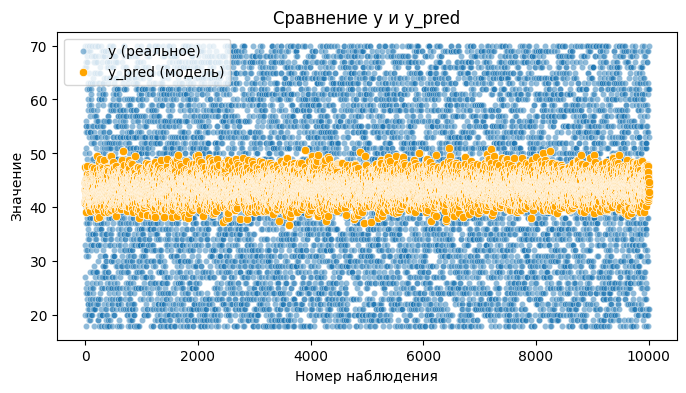

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

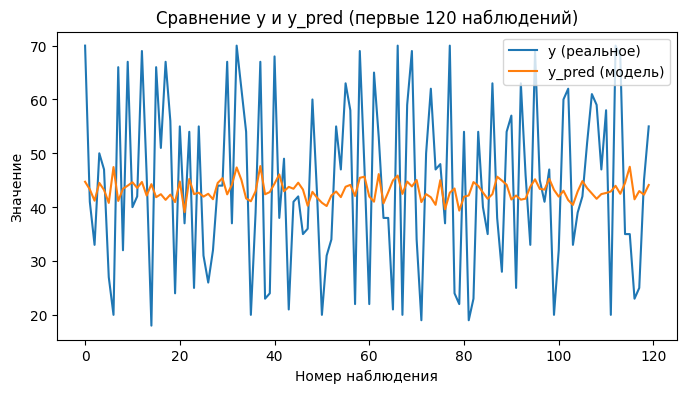

In [36]:

# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error


In [38]:
y_pred = model.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

C:\Users\Елена\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Female'

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import pandas as pd
import numpy as np

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# КОПИРУЕМ ДАННЫЕ чтобы не испортить оригинальные
X_train = X.copy()
y_train = y.copy()

# ПРЕОБРАЗУЕМ КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ
label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        label_encoders[column] = le

# ПРЕОБРАЗУЕМ ЦЕЛЕВУЮ ПЕРЕМЕННУЮ если нужно
if y_train.dtype == 'object' or isinstance(y_train.iloc[0], str):
    le_y = LabelEncoder()
    y_train_encoded = le_y.fit_transform(y_train)
else:
    y_train_encoded = y_train
    le_y = None

# ОБУЧАЕМ МОДЕЛЬ
model.fit(X_train, y_train_encoded)

# ДЕЛАЕМ ПРЕДСКАЗАНИЯ
y_pred_encoded = model.predict(X_train)

# ПРЕОБРАЗУЕМ ПРЕДСКАЗАНИЯ ОБРАТНО если нужно
if le_y is not None:
    y_pred = le_y.inverse_transform(y_pred_encoded)
else:
    y_pred = y_pred_encoded

# ВЫЧИСЛЯЕМ МЕТРИКИ
MAE = mean_absolute_error(y, y_pred)
print('MAE: %.3f' % MAE)

try:
    MAPE = mean_absolute_percentage_error(y, y_pred)
    print('MAPE: %.3f, MAPE_as_percent: %.3f%s' % (MAPE, MAPE * 100, '%'))
except:
    print("MAPE: не может быть вычислен (возможно, нулевые значения в y)")

R2 = r2_score(y, y_pred)
print('R²: %.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE: %.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE: %.3f' % RMSE)

MAE: 13.199
MAPE: 0.375, MAPE_as_percent: 37.511%
R²: 0.002
MSE: 232.721
RMSE: 15.255


Исходные типы данных:
id                           int64
Sex                         object
Occupation                  object
Field                       object
Working Hours               object
Package                     object
Job Type                    object
Company Type                object
Marital Status              object
Location                    object
Cerifications               object
Education_level             object
Allowances                  object
OverTime Pay                object
Salary Per Month            object
Bonus_No Bonus             float64
Bonus_₹20,000 - ₹50,000    float64
Bonus_₹5,000 - ₹20,000     float64
dtype: object

Категориальные колонки: ['Sex', 'Occupation', 'Field', 'Working Hours', 'Package', 'Job Type', 'Company Type', 'Marital Status', 'Location', 'Cerifications', 'Education_level', 'Allowances', 'OverTime Pay', 'Salary Per Month']

После преобразования:
id                           int64
Sex                          int64
Occupation   

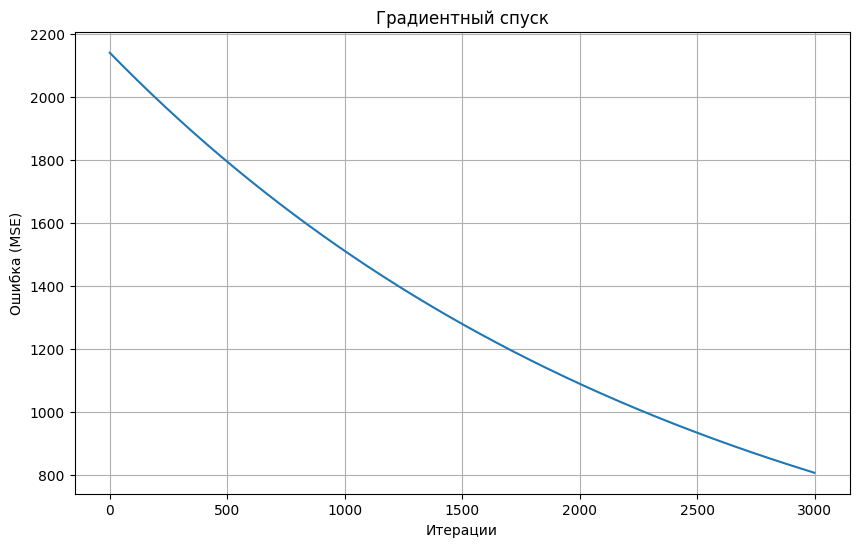


Коэффициенты модели:
Свободный член (bias): 19.7095
id: 0.0793
Sex: -0.0764
Occupation: 0.0872
Field: -0.0261
Working Hours: -0.0042
Package: 0.0745
Job Type: -0.0585
Company Type: 0.0761
Marital Status: -0.0503
Location: 0.0432
Cerifications: -0.0350
Education_level: -0.1342
Allowances: 0.0635
OverTime Pay: -0.1125
Salary Per Month: -0.0401
Bonus_No Bonus: -0.0035
Bonus_₹20,000 - ₹50,000: 0.0298
Bonus_₹5,000 - ₹20,000: -0.0259


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

def make_linear_regression(X, y, learning_rate=0.001, n_iter=1000):
    # переводим X и y в numpy
    X = np.array(X)
    y = np.array(y)

    # добавим столбец 1 для свободного члена (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    n_samples, n_features = X.shape

    # инициализация весов
    w = np.zeros(n_features)

    # история ошибок для визуализации
    losses = []

    for i in range(n_iter):
        y_pred = X.dot(w)
        error = y_pred - y

        # MSE
        loss = (error ** 2).mean()
        losses.append(loss)

        # шаг градиентного спуска
        grad = (2 / n_samples) * X.T.dot(error)
        w -= learning_rate * grad

        if i % 100 == 0:
            print(f"Итерация {i}: ошибка={loss:.4f}")

    return w, losses

# ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
def prepare_data(X, y=None):
    """
    Преобразует категориальные признаки в числовые
    """
    X_prepared = X.copy()

    # Кодируем категориальные признаки
    label_encoders = {}
    for column in X_prepared.columns:
        if X_prepared[column].dtype == 'object':
            le = LabelEncoder()
            X_prepared[column] = le.fit_transform(X_prepared[column])
            label_encoders[column] = le

    # Если y категориальный, тоже кодируем
    if y is not None:
        if y.dtype == 'object':
            le_y = LabelEncoder()
            y_prepared = le_y.fit_transform(y)
            return X_prepared, y_prepared, label_encoders, le_y
        else:
            return X_prepared, y, label_encoders, None

    return X_prepared, label_encoders

# ПОДГОТОВКА ДАННЫХ
print("Исходные типы данных:")
print(X.dtypes)
print(f"\nКатегориальные колонки: {[col for col in X.columns if X[col].dtype == 'object']}")

# Преобразуем данные
X_prepared, y_prepared, label_encoders, le_y = prepare_data(X, y)

print(f"\nПосле преобразования:")
print(X_prepared.dtypes)

# МАСШТАБИРОВАНИЕ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prepared)

# ОБУЧЕНИЕ МОДЕЛИ
print("\nЗапуск градиентного спуска...")
w, losses = make_linear_regression(X_scaled, y_prepared, learning_rate=0.0001, n_iter=3000)

# ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Итерации")
plt.ylabel("Ошибка (MSE)")
plt.title("Градиентный спуск")
plt.grid(True)
plt.show()

# ВЫВОД РЕЗУЛЬТАТОВ
print("\nКоэффициенты модели:")
print(f"Свободный член (bias): {w[0]:.4f}")
for i, col in enumerate(X_prepared.columns):
    print(f"{col}: {w[i+1]:.4f}")


In [42]:
df.head(n=3)

,id,age,Sex,Occupation,Field,Working Hours,Package,Job Type,Company Type,Marital Status,Location,Cerifications,Education_level,Bonus,Allowances,OverTime Pay,Salary Per Month
0,1,70,Female,Intermediate,CA,1 Hr,6 LPA,Remote,Non-Profit / NGO,Divorced,Metro,CFA (Chartered Financial Analyst),Professional Certification,"₹5,000 - ₹20,000",Medical Allowance,₹200/hour,77000 Rs
1,2,41,Male,Working professional,CA,3 Hr,27 LPA,Remote,Consultancy Firm,Divorced,Rural,AWS Certified Solutions Architect,Professional Certification,No Bonus,Multiple Allowances,₹300/hour,41000 Rs
2,3,33,Female,Intermediate,Finance,7 Hr,30 LPA,Remote,Outsourcing / Service-based Company,Single,City,Certified Data Scientist,Diploma,No Bonus,Medical Allowance,Compensatory Off (No extra pay),35000 Rs


In [43]:
# целевая переменная
y_eda = df["age"]

# признаки (убираем alcohol)
X_eda = df.drop(columns=["age"])

In [44]:

# P.S. в своем df я предварительно сделал .astype(cateogyr), вам нужно здесь сделать тоже самое

X_eda.describe(include='all')

,id,Sex,Occupation,Field,Working Hours,Package,Job Type,Company Type,Marital Status,Location,Cerifications,Education_level,Bonus,Allowances,OverTime Pay,Salary Per Month
count,10000.00000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,8672,10000,10000
unique,NaN,2,4,4,10,26,3,14,3,3,11,6,3,7,6,63
top,NaN,Male,Experienced,IT,3 Hr,11 LPA,Full-Time,Contract / Temporary Employment,Single,Rural,Google Cloud Professional Engineer,High School,"₹5,000 - ₹20,000",Multiple Allowances,₹300/hour,145000 Rs
freq,NaN,5001,2570,2588,1029,423,3408,767,3378,3398,952,1727,3389,1279,1707,185
mean,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2886.89568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2500.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7500.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bonus
₹5,000 - ₹20,000     3389
No Bonus             3366
₹20,000 - ₹50,000    3245
Name: count, dtype: int64


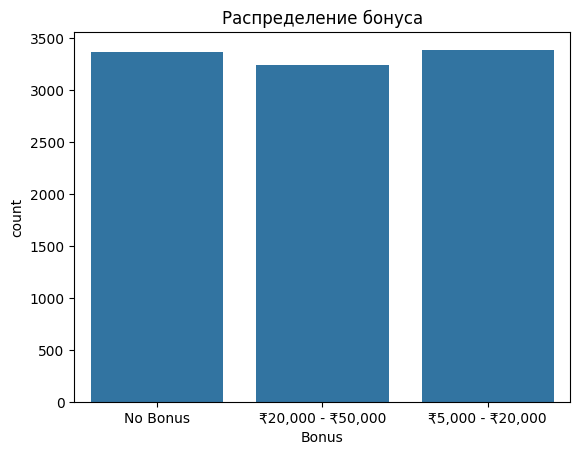

                    count       mean        std   min   25%   50%   75%   max
Bonus                                                                        
No Bonus           3366.0  43.667261  15.036215  18.0  31.0  43.0  56.0  70.0
₹20,000 - ₹50,000  3245.0  43.788598  15.350819  18.0  30.0  44.0  57.0  70.0
₹5,000 - ₹20,000   3389.0  43.589850  15.422081  18.0  30.0  43.0  57.0  70.0


C:\Users\Елена\AppData\Local\Temp\ipykernel_1620\3132550882.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Bonus")["age"].describe())


In [48]:
print(df["Bonus"].value_counts())
sns.countplot(data=df, x="Bonus")
plt.title("Распределение бонуса")
plt.show()

print(df.groupby("Bonus")["age"].describe())

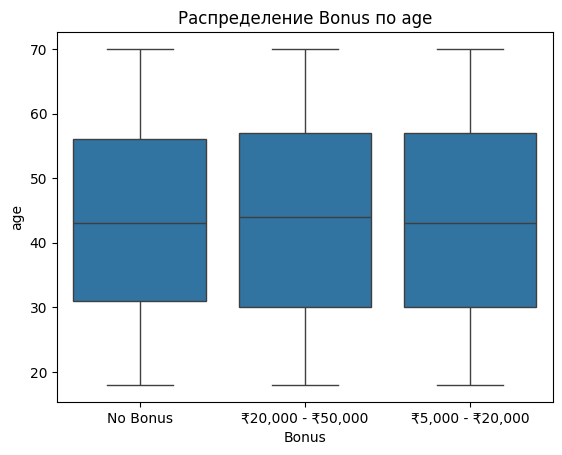

In [51]:

sns.boxplot(data=df, x="Bonus", y="age")
plt.title("Распределение Bonus по age")
plt.show()

Sex
Male      5001
Female    4999
Name: count, dtype: int64


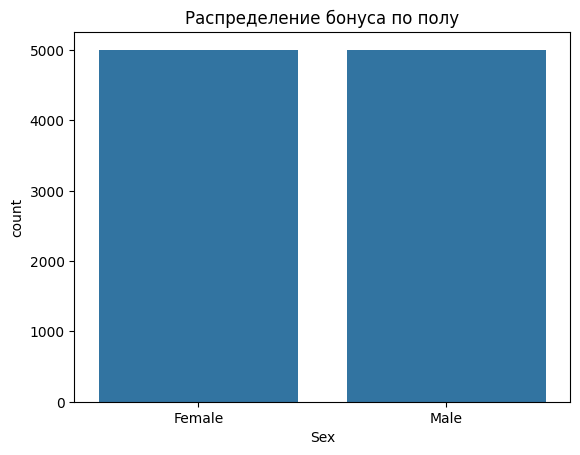

       count unique               top  freq
Sex                                        
Female  4999      3          No Bonus  1704
Male    5001      3  ₹5,000 - ₹20,000  1710


In [55]:
print(df["Sex"].value_counts())
sns.countplot(data=df, x="Sex")
plt.title("Распределение бонуса по полу")
plt.show()

print(df.groupby("Sex")["Bonus"].describe())

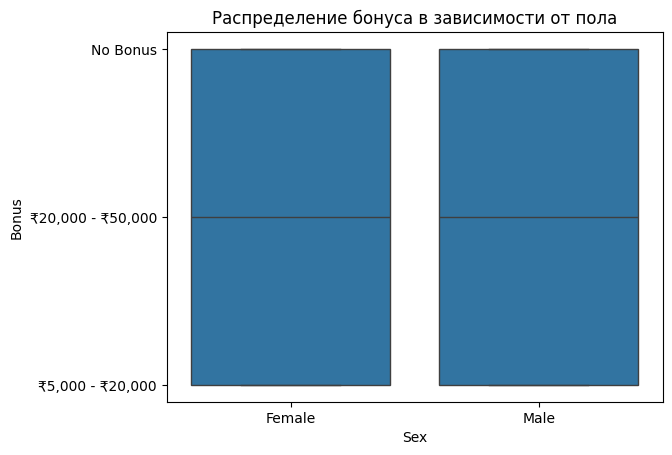

In [56]:
sns.boxplot(data=df, x="Sex", y="Bonus")
plt.title("Распределение бонуса в зависимости от пола")
plt.show()

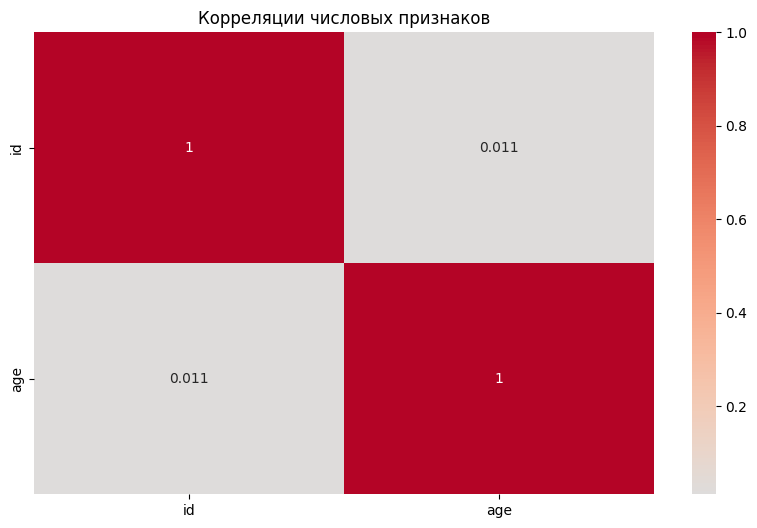

In [57]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

ValueError: could not convert string to float: 'Intermediate'

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["Working Hours"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="Working Hours", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '1 Hr'

Преобразование Working Hours...
Успешно преобразовано: 10000/10000 (100.0%)

Примеры преобразования:
  Working Hours  Working Hours_clean
0          1 Hr                  1.0
1          3 Hr                  3.0
2          7 Hr                  7.0
3          4 Hr                  4.0
4          4 Hr                  4.0
5          4 Hr                  4.0
6          9 Hr                  9.0
7          5 Hr                  5.0
8          3 Hr                  3.0
9          2 Hr                  2.0


C:\Users\Елена\AppData\Local\Temp\ipykernel_1620\3168645551.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


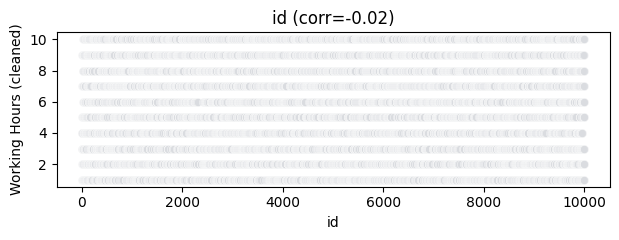


Корреляции с Working Hours:
  id                    -0.016 


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

def clean_working_hours(df):
    """
    Преобразует Working Hours в числовой формат
    """
    df_clean = df.copy()

    def convert_hours(value):
        if pd.isna(value):
            return np.nan

        value_str = str(value).lower().strip()

        # Удаляем лишние пробелы
        value_str = re.sub(r'\s+', ' ', value_str)

        # Обрабатываем разные форматы
        if value_str in ['flexible', 'as needed', 'varies']:
            return np.nan  # или можно задать среднее значение

        # Извлекаем числа из строк
        numbers = re.findall(r'\d+\.?\d*', value_str)
        if numbers:
            hours = float(numbers[0])

            # Учитываем единицы измерения
            if 'min' in value_str or 'мин' in value_str:
                hours = hours / 60  # минуты в часы
            elif 'hr' in value_str or 'hour' in value_str:
                hours = hours  # уже в часах
            elif 'day' in value_str:
                hours = hours * 8  # предполагаем 8-часовой рабочий день

            return hours
        return np.nan

    # Применяем преобразование
    df_clean["Working Hours_clean"] = df_clean["Working Hours"].apply(convert_hours)

    # Проверяем результат
    converted_count = df_clean["Working Hours_clean"].notna().sum()
    total_count = len(df_clean)
    print(f"Успешно преобразовано: {converted_count}/{total_count} ({converted_count/total_count:.1%})")

    return df_clean

# ОЧИСТКА ДАННЫХ
print("Преобразование Working Hours...")
df_clean = clean_working_hours(df)

# ПРОВЕРЯЕМ РЕЗУЛЬТАТ
print("\nПримеры преобразования:")
sample_data = df[["Working Hours"]].copy()
sample_data["Working Hours_clean"] = df_clean["Working Hours_clean"]
print(sample_data.head(10))

# ВЫБИРАЕМ ЧИСЛОВЫЕ КОЛОНКИ
num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# КОРРЕЛЯЦИИ С ОЧИЩЕННЫМИ WORKING HOURS
corrs = df_clean[num_features].corrwith(df_clean["Working Hours_clean"])

# ПАЛИТРА
cmap = plt.cm.get_cmap("coolwarm")

# СЕТКА ГРАФИКОВ
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(12, n*2.5))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df_clean, x=col, y="Working Hours_clean",
                   color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")
    axes[i].set_ylabel("Working Hours (cleaned)")

# УДАЛЯЕМ ПУСТЫЕ ЯЧЕЙКИ
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ВЫВОДИМ КОРРЕЛЯЦИИ
print("\nКорреляции с Working Hours:")
for col, corr in corrs.sort_values(ascending=False).items():
    significance = "***" if abs(corr) > 0.5 else "**" if abs(corr) > 0.3 else "*" if abs(corr) > 0.1 else ""
    print(f"  {col:20} {corr:7.3f} {significance}")

In [98]:
categorial_features = ['Working Hours']
numerical_features = ['id']

best_features = categorial_features + numerical_features # соединение массивов

X = df[best_features] # обращение к нескольким колонкам
y = df.id

KeyError: "None of [Index(['Working Hours', 'id'], dtype='object')] are in the [columns]"

In [97]:
X.head(n=2)

,Working Hours,id
0,1 Hr,1
1,3 Hr,2


In [78]:
y.head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [81]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [85]:

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

In [86]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)


метрики для выборки на которых обучалась модель
MAE 0.000
MAPE=0.000, MAPE_as_percent=0.000%
R2=1.000
MSE=0.000
RMSE=0.000


In [87]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.000
MAPE=0.000, MAPE_as_percent=0.000%
R2=1.000
MSE=0.000
RMSE=0.000


In [88]:
model.coef_

array([ 2.88675133e+03, -5.81647141e-13, -5.45275327e-13, -1.47260520e-12,
       -4.39998813e-14, -1.25864278e-12, -4.80082644e-13,  7.76180262e-13,
        1.79440687e-12, -1.12396931e-12,  4.45047563e-14,  1.18340435e-12,
        4.92167483e-13, -4.92386576e-13, -9.46377908e-13,  1.45370858e-12,
        2.33459337e-12, -3.46260833e-12])

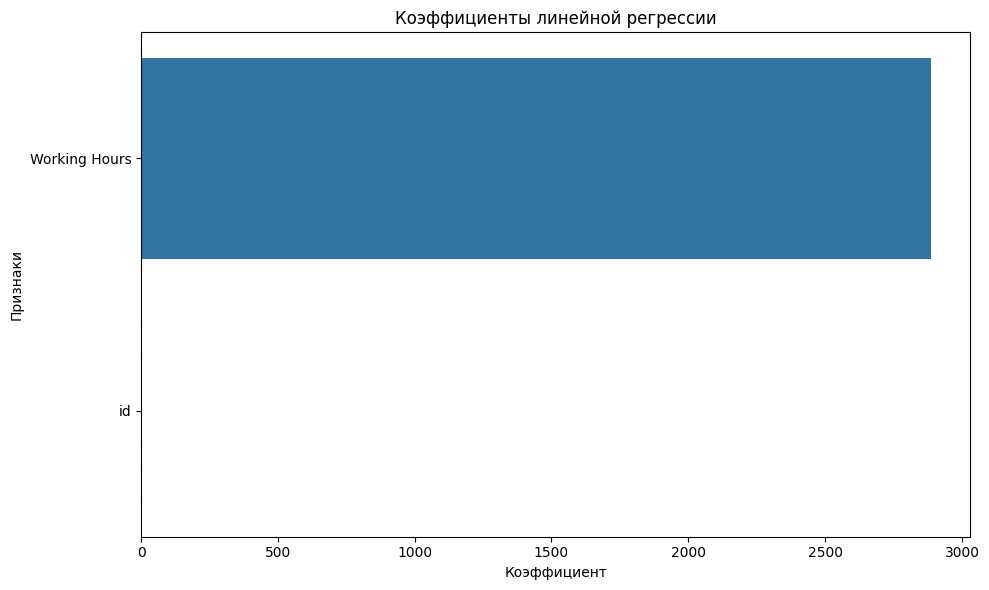

In [92]:
plt.figure(figsize=(10,6))

# Если в коэффициентах есть intercept (на 1 элемент больше)
if len(model.coef_) == len(X.columns) + 1:
    # Берем только коэффициенты признаков (без intercept)
    feature_coef = model.coef_[1:]  # предполагаем, что intercept первый
    feature_names = X.columns
    intercept = model.coef_[0]
    print(f"Intercept включен в coefficients: {intercept}")

elif len(model.coef_) == len(X.columns):
    feature_coef = model.coef_
    feature_names = X.columns
    if hasattr(model, 'intercept_'):
        print(f"Intercept отдельно: {model.intercept_}")
else:
    # Общий случай
    feature_coef = model.coef_[:len(X.columns)]
    feature_names = X.columns[:len(model.coef_)]

# Создаем DataFrame
coef_data = pd.DataFrame({
    'feature': feature_names,
    'coefficient': feature_coef
}).sort_values('coefficient', key=abs, ascending=False)

# Строим график
sns.barplot(data=coef_data, x='coefficient', y='feature', orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [93]:
import pandas as pd
import numpy as np

np.random.seed(42)

# категории
animals = np.random.choice(['cat', 'dog', None], size=20, p=[0.4, 0.4, 0.2])
ages = np.random.choice([1.5, 2.0, 2.5, 3.0, None], size=20, p=[0.2, 0.3, 0.2, 0.2, 0.1])

df = pd.DataFrame({
    "animal": animals,
    "age": ages
})

df

,animal,age
0,cat,2.5
1,None,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,None,2.5
8,dog,2.5
9,dog,1.5
